/home/manishg/Research/NExG/


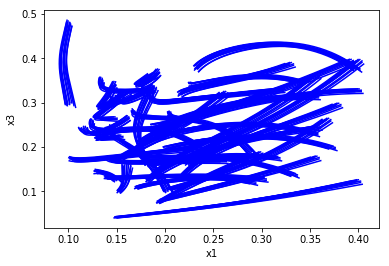

/home/manishg/Research/NExG/eval-emsoft/eval-gr/dconfigs_inv/d_object_BiologicalModel1
10
Avg vp is 0.008107237764138983
Max vp is 0.014880750368597585
/home/manishg/Research/NExG/eval-emsoft/eval-gr
Gradient: True
(334400, 22)
(300960, 22)
(300960, 7)
normalized

Setting the activation function to default - ReLU.

***** learning module ***227
Epoch 1/30
4703/4703 [==============================] - 20s 4ms/step - loss: 0.0769 - accuracy: 0.9089 - mse: 0.0110
Epoch 2/30
4703/4703 [==============================] - 21s 4ms/step - loss: 0.0559 - accuracy: 0.9562 - mse: 0.0050
Epoch 3/30
4703/4703 [==============================] - 21s 4ms/step - loss: 0.0512 - accuracy: 0.9646 - mse: 0.0042
Epoch 4/30
4703/4703 [==============================] - 22s 5ms/step - loss: 0.0489 - accuracy: 0.9697 - mse: 0.0038
Epoch 5/30
4703/4703 [==============================] - 22s 5ms/step - loss: 0.0478 - accuracy: 0.9704 - mse: 0.0036
Epoch 6/30
4703/4703 [==============================] - 22s 5ms/step 

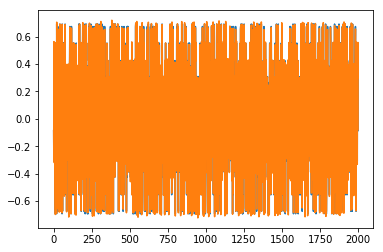

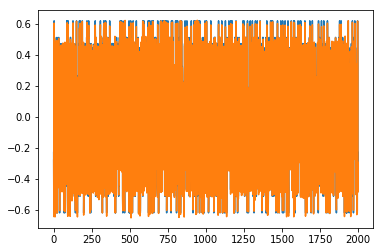

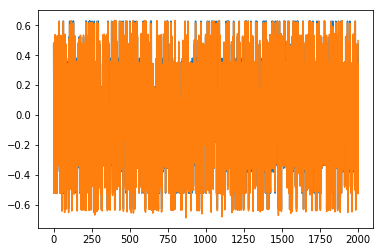

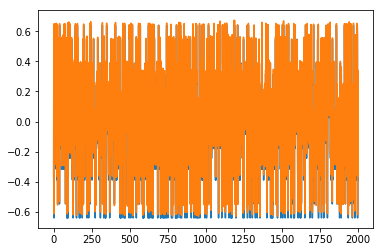

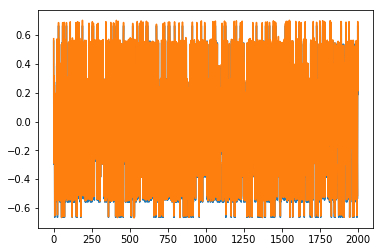

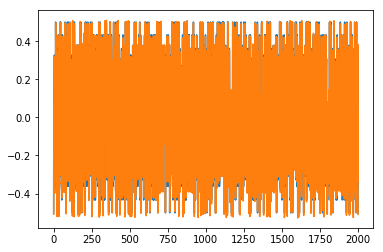

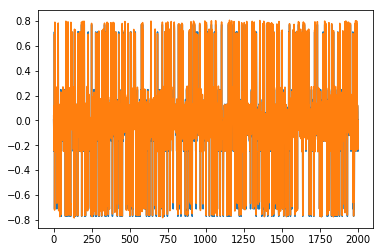

(33440, 7)
(33440, 7)


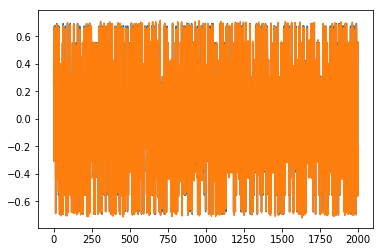

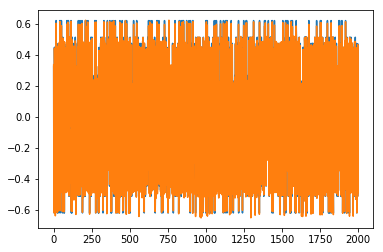

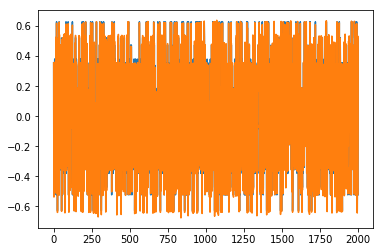

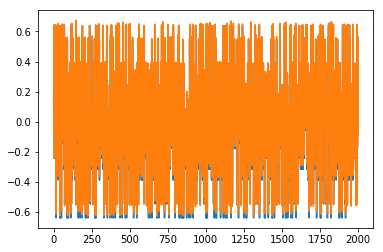

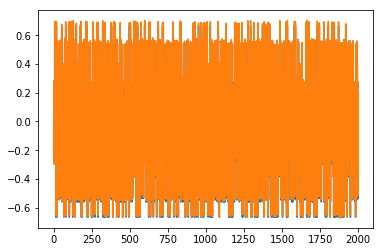

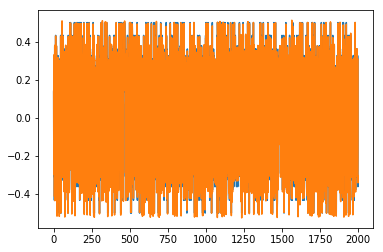

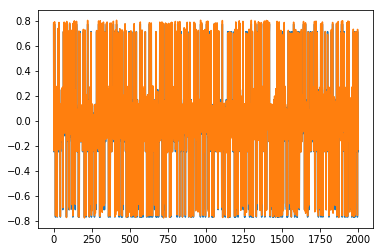

In [1]:
import matplotlib
%matplotlib inline

import os
nxg_path = os.environ.get('NXG_PATH')
print(nxg_path)

import sys
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')

from learningModule import DataConfiguration, CreateTrainNN

epochs = 30
dynamics = 'BiologicalModel1'
dataObject = DataConfiguration(dynamics=dynamics, dimensions=7, gradient_run=True)
dataObject.setSteps(200)
dataObject.setSamples(40)
# dataObject.setLowerBound([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
# dataObject.setUpperBound([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6])
dataObject.setLowerBound([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
dataObject.setUpperBound([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dataObject.generateTrajectories(scaling=0.01, dump_i_states=True)
dataObject.showTrajectories(xindex=1, yindex=3)
dataObject.createData(jumps=[1,2,5,7,11,13,17,19])

nnObject1 = CreateTrainNN(dynamics=dynamics, dnn_rbf='RBF')
nnObject1.createInputOutput(data_object = dataObject, inp_vars=['x','xp','vp','t'], out_vars=['v'])
nnObject1.setEpochs(epochs)
nnObject1.trainTestNN(optim='SGD', loss_fn='mae', layers=1, neurons=512)

In [3]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='BiologicalModel1')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setGradientRun(False)

ref_traj = dataObject.generateTrajectories(samples=1)[0]

lowerBound = [0.45, 0.20, 0.15, 0.25, 0.20, 0.15, 0.20]
upperBound = [0.50, 0.25, 0.20, 0.30, 0.25, 0.20, 0.25]

evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.6, 0.8]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    print(ref_traj[0], ref_traj[70])
    dest = evalObject.generateRandomUnsafeStates(1)
#     dest_traj = dataObject.generateTrajectories(samples=1)[0]
#     print(dest_traj[70])
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

# S-TaLiRo: robustness = 0.046 (k = 149)

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_BiologicalModel1.txt
Idx *** 0
[0.27078643 0.33941762 0.36545368 0.18641271 0.23882328 0.23056924
 0.13900564] [0.38311185 0.23727662 0.35526926 0.14114126 0.28409473 0.13727962
 0.23229526]
[[0.4963280830841499, 0.21969522360779967, 0.16032257439831224, 0.2824403763030603, 0.21335226434272697, 0.15713563958029153, 0.23511237248686945]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
74
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27644480624466905
Best robustness -0.00037728134970752003
Final distance 0.03955513855471077
Final simulation: 4
Time taken: 0.18374085426330566
Idx *** 1
[0.1233701  0.11637087 0.27142161 0.2655038  0.34040444 0.30161826
 0.3313379 ] [0.26835782 0.10126612 0.14153864 0.3146901  0.29121814 0.19

Best robustness -5.136781542103286e-05
Final distance 0.008456831770444028
Final simulation: 21
Time taken: 1.0099034309387207
Idx *** 11
[0.35705691 0.3393428  0.1907587  0.20252427 0.18411471 0.10006574
 0.39203308] [0.39069833 0.24433973 0.25212035 0.15582681 0.23081217 0.13722949
 0.35486933]
[[0.45739609701701467, 0.2392953299461118, 0.17829537897956677, 0.2506354172920337, 0.23855239932760017, 0.15639827682232846, 0.24387253185834634]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
63
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1776611969760128
Best robustness -0.0021682856809581708
Final distance 0.017130412871999477
Final simulation: 47
Time taken: 3.2874629497528076
Idx *** 12
[0.38401194 0.35887214 0.14889044 0.39362702 0.37949263 0.22068775
 0.35541302] [0.47817926 0.26670377 0

Best robustness -0.009891760986211862
Final distance 0.03426440487234043
Final simulation: 5
Time taken: 0.2505075931549072
Idx *** 22
[0.23155047 0.31785097 0.11448386 0.16621551 0.33365782 0.35809832
 0.20080762] [0.29159287 0.21016221 0.16213022 0.27598548 0.22388786 0.21873054
 0.3401754 ]
[[0.47317687549538223, 0.22673600910943387, 0.19479734901394738, 0.2650310108210651, 0.20535813256129393, 0.16110737274163472, 0.23354955918673972]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21782119856807708
Best robustness -9.653354294286709e-06
Final distance 0.03357691768476789
Final simulation: 8
Time taken: 0.401979923248291
Idx *** 23
[0.15039862 0.20212802 0.27894284 0.15242753 0.3355578  0.21540936
 0.36493868] [0.25371495 0.14277171 0.234

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27814761623756856
Best robustness -0.0004493556314527636
Final distance 0.0053793160091093264
Final simulation: 7
Time taken: 0.306166410446167
Idx *** 34
[0.18657886 0.15705543 0.34533707 0.39671771 0.35837965 0.34413818
 0.23355985] [0.40023959 0.14493271 0.14379906 0.39108142 0.36401594 0.16702684
 0.41067119]
[[0.45059299368098893, 0.24850324908013544, 0.1557635062962507, 0.26314821520630427, 0.20142922020751972, 0.18623256952270573, 0.21369835867422385]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.30436706729597474
Best robustness -0.0137944268312

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31692504827523216
Best robustness 0.01701856409100272
Final distance 0.03372747344120946
Final simulation: 51
Time taken: 2.357041120529175
Idx *** 45
[0.11367052 0.37346605 0.30507324 0.15968776 0.21492343 0.34322291
 0.2595537 ] [0.25384366 0.22461835 0.3137478  0.17132188 0.20328931 0.24952262
 0.35325398]
[[0.45843632138026225, 0.2015157688778521, 0.1894590503459752, 0.2963411869002255, 0.2352639520113947, 0.17386323517126068, 0.22085241172829137]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.30383566742926105
Best robustness -0.003925562288063178
F

Best robustness -0.0004752349383836396
Final distance 0.06457415259416018
Final simulation: 3
Time taken: 0.1416616439819336
Idx *** 56
[0.36657541 0.32370047 0.16337675 0.13873752 0.37003207 0.19436782
 0.12420765] [0.38673934 0.23603243 0.23088086 0.17374594 0.33502365 0.09942728
 0.21914819]
[[0.47213424942891025, 0.20509724592834028, 0.19421002776820684, 0.27277440581666973, 0.2369754843862502, 0.18845936645643388, 0.24394398223252148]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1919050669144817
Best robustness -0.00059947425210502
Final distance 0.023098918761111364
Final simulation: 8
Time taken: 0.3664376735687256
Idx *** 57
[0.30624021 0.12003898 0.33012268 0.32698103 0.37430578 0.2964926
 0.16951351] [0.45420152 0.14172134 0.1604

Best robustness 0.004659737493617366
Final distance 0.06627125353163242
Final simulation: 51
Time taken: 2.3766062259674072
Idx *** 67
[0.3968446  0.18041797 0.32405265 0.2009211  0.33741557 0.38017603
 0.35398844] [0.50011693 0.18224911 0.21894918 0.2674615  0.27087516 0.23891554
 0.49524894]
[[0.47548463797341617, 0.23162017496178317, 0.16534908197390277, 0.2600462236335038, 0.225569823235692, 0.1597279227128653, 0.23209943708225056]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.28631721367286495
Best robustness -0.012382391026619893
Final distance 0.013676965600970179
Final simulation: 8
Time taken: 0.3655576705932617
Idx *** 68
[0.37617359 0.39318557 0.24410041 0.24327706 0.36015456 0.15560915
 0.35732242] [0.46480687 0.28165745 0.26699

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23595039427441492
Best robustness -0.0001567993672996204
Final distance 0.04140846633970991
Final simulation: 3
Time taken: 0.11849808692932129
Idx *** 79
[0.31914266 0.11507043 0.1135851  0.10840764 0.29888392 0.21211276
 0.31379652] [0.30343823 0.11889703 0.12546293 0.19654902 0.21074255 0.17310386
 0.35280542]
[[0.4577120305290033, 0.21756793410318376, 0.15280957133619055, 0.2663639299580301, 0.2018250744659972, 0.18407062885316827, 0.21998048367578701]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23734905475544688
Best robustness -0.007854566500614

Best robustness -0.012362826563798723
Final distance 0.02405891673780147
Final simulation: 26
Time taken: 1.2098462581634521
Idx *** 90
[0.29131101 0.36103314 0.32935341 0.10521686 0.10169468 0.12479444
 0.12476892] [0.30889195 0.24057119 0.43223443 0.05744606 0.14946548 0.1150664
 0.13449696]
[[0.4992190322475789, 0.20291798423777221, 0.15106251001284354, 0.27928876403789105, 0.22244748432447606, 0.19024231992927643, 0.21059307456471243]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.41964430061564384
Best robustness 0.0077005432924661665
Final distance 0.01593764508876587
Final simulation: 51
Time taken: 2.3461368083953857
Idx *** 91
[0.28630101 0.30966748 0.13682279 0.19997976 0.28631057 0.38626946
 0.12648188] [0.34791679 0.21768313 0.16

Best robustness 0.013320583938598973
Final distance 0.035023655148841246
Final simulation: 51
Time taken: 2.341460704803467
Idx *** 101
[0.34565821 0.26297526 0.36207123 0.36216287 0.22244789 0.22512617
 0.27701701] [0.51175631 0.22317117 0.23577721 0.25621858 0.32839217 0.15004679
 0.35209638]
[[0.458154671671894, 0.21779223519679847, 0.153110779428225, 0.28139199927064806, 0.24584437028732864, 0.1795570710133928, 0.21360721353055903]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18453710862030184
Best robustness -0.0010819557312110595
Final distance 0.01985166603185799
Final simulation: 31
Time taken: 1.3625681400299072
Idx *** 102
[0.15651531 0.39472606 0.35303598 0.16619552 0.25410635 0.1163459
 0.372437  ] [0.27037896 0.24164728 0.3922

Best robustness -0.00020203732089851822
Final distance 0.038242644483395635
Final simulation: 25
Time taken: 1.133230447769165
Idx *** 112
[0.13090358 0.32421977 0.20946557 0.1955913  0.20456231 0.33166135
 0.14846895] [0.2429261  0.20028216 0.22138066 0.21004542 0.19010819 0.22615664
 0.25397366]
[[0.4646528612015667, 0.23048550590057648, 0.17015341163569295, 0.29932657408701485, 0.2227988058266983, 0.18616519264934317, 0.24689107713615366]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24273799707862473
Best robustness 0.006424828477869071
Final distance 0.0028703010117578525
Final simulation: 51
Time taken: 2.334484100341797
Idx *** 113
[0.25344132 0.34284643 0.36940223 0.28098368 0.13118943 0.34123741
 0.22719203] [0.4206253  0.24303402 

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19850018686670212
Best robustness -0.008973993479597098
Final distance 0.025432621129854883
Final simulation: 46
Time taken: 2.120319366455078
Idx *** 124
[0.16613008 0.31842995 0.35362357 0.1014638  0.28574082 0.38466666
 0.23683307] [0.29085352 0.20539489 0.34193519 0.16309132 0.22411329 0.24763396
 0.37386577]
[[0.4591574294545265, 0.2480378684554148, 0.1883889035316577, 0.29704299724275557, 0.21936297920362313, 0.17390113004635477, 0.24552440040293183]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.298712989476036
Best robustness -0.00142970995178470

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21400245029279044
Best robustness -0.0009466211512782763
Final distance 0.04171380166942501
Final simulation: 3
Time taken: 0.12163138389587402
Idx *** 135
[0.19367534 0.19843292 0.2464174  0.29020191 0.13014092 0.16475505
 0.30286344] [0.30059095 0.15167385 0.18626086 0.21613033 0.20421251 0.16458807
 0.30303043]
[[0.48069316409086793, 0.20589097350196595, 0.19508567825288303, 0.254355336141411, 0.2370593244353096, 0.16893531880778792, 0.2084529130759248]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21314208908752288
Best robustness 0.0057509688775794

Best robustness -0.003492145726963908
Final distance 0.05582964783210832
Final simulation: 3
Time taken: 0.14128637313842773
Idx *** 146
[0.37799395 0.25758622 0.36482274 0.19265107 0.16972242 0.3885723
 0.3863424 ] [0.47704097 0.2163623  0.30699963 0.18612192 0.17625156 0.32294159
 0.45197311]
[[0.48951638896417465, 0.20272261034871197, 0.17937992575163872, 0.2769876112830985, 0.20618010145476048, 0.19567442656740572, 0.2350400205826635]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.29723659133806396
Best robustness -0.0004720246004432105
Final distance 0.024581047595736615
Final simulation: 6
Time taken: 0.27155447006225586
Idx *** 147
[0.18587985 0.12614102 0.37071299 0.29325491 0.25685515 0.1395232
 0.14829726] [0.33371542 0.12071272 0.

Best robustness -0.0029556561474021747
Final distance 0.03775447934500225
Final simulation: 9
Time taken: 0.4150710105895996
Idx *** 157
[0.26647114 0.19871373 0.16741868 0.36721458 0.18240533 0.23968731
 0.1590031 ] [0.34912749 0.16315912 0.12031693 0.33643908 0.21318083 0.16901157
 0.22967884]
[[0.4889872274621816, 0.2242239723665912, 0.18104472838022698, 0.26268394908308834, 0.22718771167871385, 0.16184485368111567, 0.21960918782074093]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1784496564601552
Best robustness -0.02166252075755226
Final distance 0.02851812172977595
Final simulation: 2
Time taken: 0.08733534812927246
Idx *** 158
[0.16483608 0.14743367 0.22213394 0.24769859 0.14086679 0.30454573
 0.12947397] [0.25820419 0.11835165 0.15

Best robustness -0.00034875753791691055
Final distance 0.05228512792040079
Final simulation: 4
Time taken: 0.18734335899353027
Idx *** 168
[0.27436891 0.22000875 0.29180697 0.20162613 0.38103194 0.38299404
 0.21925697] [0.40221314 0.17994996 0.20402153 0.27965642 0.30300165 0.19916252
 0.40308848]
[[0.48807211047726273, 0.20145266676965823, 0.1555178400534859, 0.28264843272866513, 0.22271059637452018, 0.18439549614508402, 0.2384359164968272]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20948256337024934
Best robustness -0.008281819265099272
Final distance 0.03975219292762796
Final simulation: 3
Time taken: 0.1239926815032959
Idx *** 169
[0.3994763  0.12241105 0.39027153 0.19808383 0.28840741 0.32480192
 0.15486036] [0.4977703  0.15421108 0

Best robustness -0.0021752692949723873
Final distance 0.02541887091934158
Final simulation: 6
Time taken: 0.29007744789123535
Idx *** 179
[0.34721557 0.21440204 0.37465917 0.29024593 0.29179201 0.23919417
 0.29947168] [0.49253925 0.19604406 0.24769347 0.23505611 0.34698183 0.14999736
 0.38866849]
[[0.49615597725285404, 0.21074885217542494, 0.19669291673588463, 0.25496060045765406, 0.2018252962424108, 0.17984957776629834, 0.23705345149231732]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21421231740069008
Best robustness 0.018152929665873563
Final distance 0.05163737408270819
Final simulation: 51
Time taken: 2.5473499298095703
Idx *** 180
[0.33108768 0.16766254 0.13895257 0.19914821 0.26370967 0.342684
 0.29937674] [0.35728178 0.15259079 0.1

Best robustness -0.0007081766058845695
Final distance 0.028375305232227976
Final simulation: 5
Time taken: 0.21085381507873535
Idx *** 190
[0.29449955 0.23118844 0.10343163 0.13916719 0.12867928 0.15326386
 0.31476171] [0.28568863 0.17252658 0.17090441 0.14215004 0.12569644 0.18302062
 0.28500496]
[[0.46825416886423865, 0.21506753376606177, 0.19884839451559155, 0.2526867770126543, 0.2383060672920846, 0.15749944274021332, 0.2338323616146632]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2528875577296735
Best robustness -0.008487081974871885
Final distance 0.02477354263313244
Final simulation: 16
Time taken: 0.7296040058135986
Idx *** 191
[0.10946273 0.20534345 0.23931107 0.32976279 0.10354453 0.29563929
 0.39834984] [0.2530854  0.14262306 0.

Best robustness 0.013006710308771596
Final distance 0.01415791721378465
Final simulation: 51
Time taken: 2.3667705059051514
Idx *** 201
[0.1800179  0.10185555 0.16911735 0.31930511 0.12389591 0.14784033
 0.39130047] [0.25010562 0.09632882 0.10455637 0.27903165 0.16416937 0.18450399
 0.35463681]
[[0.47588468236684106, 0.23930968456175372, 0.19849941220109482, 0.2708753509565952, 0.20300821151482046, 0.19505680167452483, 0.2161799666096783]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31571646628966066
Best robustness 0.008240302986872894
Final distance 0.026017185060690378
Final simulation: 51
Time taken: 2.2599220275878906
Idx *** 202
[0.13343559 0.1088821  0.10529941 0.23422585 0.31495543 0.22261711
 0.13038929] [0.18006339 0.08647638 0.0

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3579204978957525
Best robustness -0.017499669858400596
Final distance 0.021852585422048154
Final simulation: 5
Time taken: 0.23956990242004395
Idx *** 213
[0.32225422 0.24945715 0.13801032 0.345835   0.24163878 0.33281188
 0.36102644] [0.39296771 0.19720321 0.11955078 0.3891452  0.19832859 0.26039233
 0.43344599]
[[0.4832592119853465, 0.21207892515230015, 0.15707373996197618, 0.26058567827539947, 0.24144082914214182, 0.1872599882373767, 0.21957060204646667]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27967288423781794
Best robustness -5.86604755736519

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
64
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19694059436808894
Best robustness -0.01595912818735848
Final distance 0.01789504639823075
Final simulation: 27
Time taken: 1.4701554775238037
Idx *** 225
[0.28982768 0.31708584 0.20788377 0.33767907 0.22220282 0.35401199
 0.26533283] [0.4142839  0.23121209 0.16930131 0.33642071 0.22346119 0.24549106
 0.37385375]
[[0.475050849360325, 0.2121578426911651, 0.16022101395894714, 0.29376474586826895, 0.24748147584640684, 0.17568109483683758, 0.24315567055892578]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16743648726034976
Best robustness -3.102113910846693e

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2947767093967837
Best robustness -0.000610329745597632
Final distance 0.016379320393059615
Final simulation: 15
Time taken: 0.741464376449585
Idx *** 237
[0.2306505  0.38196997 0.10223832 0.11633911 0.2925605  0.37268634
 0.29549213] [0.27905587 0.23998004 0.19582288 0.22795017 0.18094945 0.27098918
 0.3971893 ]
[[0.4778435500267147, 0.20779253110681756, 0.1658184914871564, 0.2849866983953478, 0.20658615114177664, 0.16263585763733593, 0.2194286599894385]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.29186041820904557
Best robustness -0.00099540512758855

Best robustness -0.01609348966589247
Final distance 0.04031723584558358
Final simulation: 4
Time taken: 0.2651398181915283
Idx *** 248
[0.3418901  0.24113043 0.14881501 0.27660343 0.14920338 0.11500662
 0.3967107 ] [0.37674136 0.19289261 0.16220158 0.2289654  0.19684141 0.15643898
 0.35527835]
[[0.49966031778030157, 0.22243976315543657, 0.18526126759987815, 0.27465367126374673, 0.2112980600983127, 0.17086876335198753, 0.24163388207172706]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel1_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17657130197368218
Best robustness 0.006659138443043278
Final distance 0.041319459107808695
Final simulation: 51
Time taken: 3.681716203689575
Idx *** 249
[0.34435887 0.11124412 0.14374737 0.36300959 0.12292015 0.15017717
 0.11949803] [0.37299731 0.12909714 0.09

/home/manishg/Research/NExG/


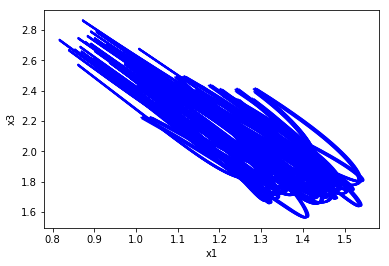

/home/manishg/Research/NExG/eval-emsoft/eval-gr/dconfigs_inv/d_object_LaubLoomis
10
Avg vp is 0.004772277958657588
Max vp is 0.009746420250801347
/home/manishg/Research/NExG/eval-emsoft/eval-gr
Gradient: True
(334400, 22)
(300960, 22)
(300960, 7)
normalized

Setting the activation function to default - ReLU.

***** learning module *** 22
***** learning module *** 7
Epoch 1/30
4703/4703 [==============================] - 23s 5ms/step - loss: 0.1239 - accuracy: 0.6989 - mse: 0.0283
Epoch 2/30
4703/4703 [==============================] - 22s 5ms/step - loss: 0.0820 - accuracy: 0.8002 - mse: 0.0116
Epoch 3/30
4703/4703 [==============================] - 23s 5ms/step - loss: 0.0699 - accuracy: 0.8278 - mse: 0.0084
Epoch 4/30
4703/4703 [==============================] - 24s 5ms/step - loss: 0.0638 - accuracy: 0.8454 - mse: 0.0070
Epoch 5/30
4703/4703 [==============================] - 23s 5ms/step - loss: 0.0596 - accuracy: 0.8590 - mse: 0.0060
Epoch 6/30
4703/4703 [=========================

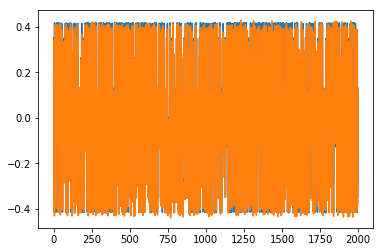

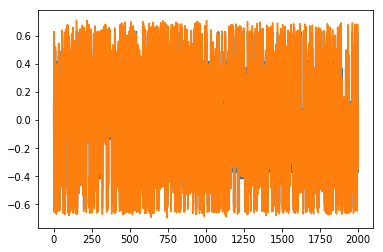

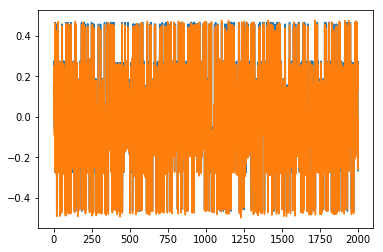

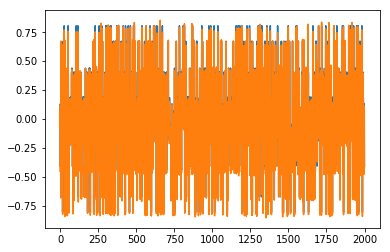

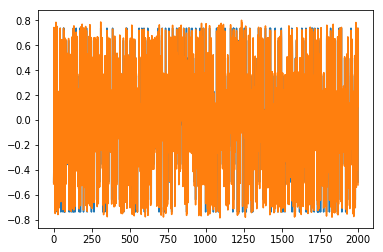

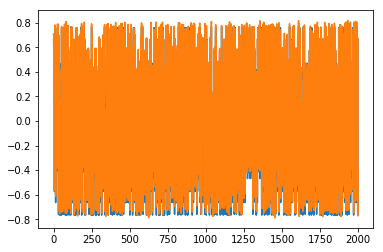

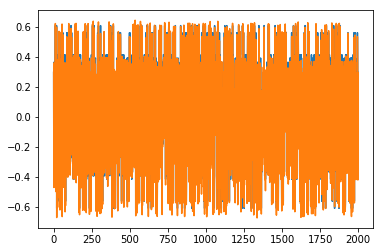

(33440, 7)
(33440, 7)


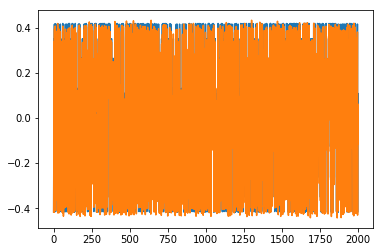

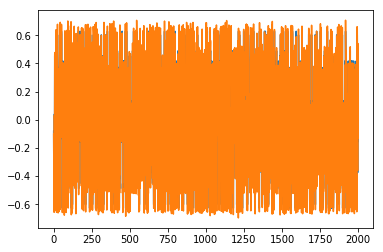

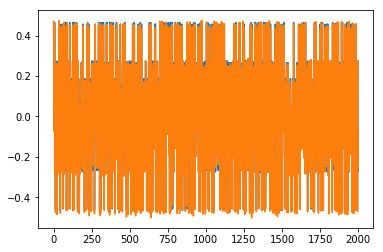

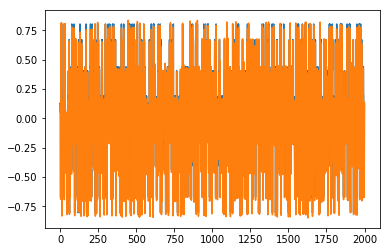

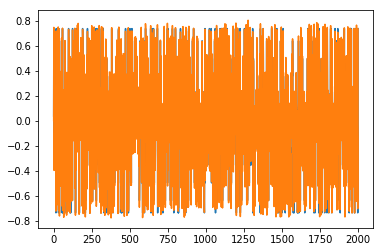

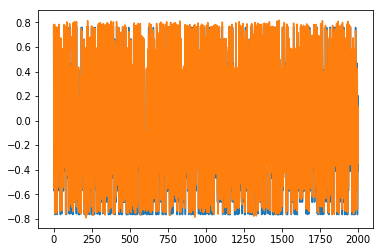

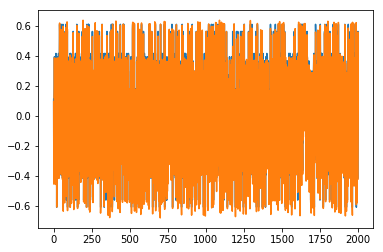

In [36]:
import matplotlib
%matplotlib inline

import os
nxg_path = os.environ.get('NXG_PATH')
print(nxg_path)

import sys
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')

from learningModule import DataConfiguration, CreateTrainNN

epochs = 30
dynamics = 'LaubLoomis'
dataObject = DataConfiguration(dynamics=dynamics, dimensions=7, gradient_run=True)
dataObject.setSteps(200)
dataObject.setSamples(40)
dataObject.setLowerBound([1.1, 1.0, 1.4, 2.2, 1.2, 0.0, 0.4])
dataObject.setUpperBound([1.4, 1.3, 1.7, 2.5, 1.5, 0.3, 0.7])
dataObject.generateTrajectories(scaling=0.01, dump_i_states=True)
dataObject.showTrajectories(xindex=1, yindex=3)
dataObject.createData(jumps=[1,2,5,7,11,13,17,19])

nnObject1 = CreateTrainNN(dynamics=dynamics, dnn_rbf='RBF')
nnObject1.createInputOutput(data_object = dataObject, inp_vars=['x','xp','vp','t'], out_vars=['v'])
nnObject1.setEpochs(epochs)
nnObject1.trainTestNN(optim='SGD', loss_fn='mae', layers=1, neurons=512)

In [38]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='LaubLoomis')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()

ref_traj = dataObject.generateTrajectories(samples=1)[0]

lowerBound = [1.45, 1.40, 0.70, 1.70, 0.75, 0.10, 0.15]
upperBound = [1.50, 1.45, 0.75, 1.75, 0.80, 0.15, 0.20]

evalObject.setUnsafeSet(lowerBound, upperBound)
# dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    print(ref_traj[0], ref_traj[80])
    dest = evalObject.generateRandomUnsafeStates(1)
#     dest_traj = dataObject.generateTrajectories(samples=1)[0]
#     print(dest_traj[70])
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

# S-TaLiRo: robustness = 0.0033 (k = 112)

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_LaubLoomis.txt
Idx *** 0
[1.33058866 1.24833593 1.57267347 2.284611   1.4392297  0.08483555
 0.49918194] [1.47315184 1.47885793 0.69253021 1.77158654 0.78291544 0.14071351
 0.17106747]
[[1.4834578823168858, 1.4471209844071462, 0.7234444758017867, 1.7286467419553075, 0.7999631324034706, 0.14225406008286628, 0.1614407317329956]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05259234837576987
Best robustness -0.00021364044191862774
Final distance 0.027568551965099396
Final simulation: 2
Time taken: 0.09699273109436035
Idx *** 1
[1.2525231  1.20413032 1.51958718 2.27579978 1.24681367 0.10894731
 0.6291454 ] [1.44856995 1.35072445 0.74354846 1.74689021 0.72465502 0.13861199
 0.21486

Best robustness 0.021586063599849686
Final distance 0.07481881755825838
Final simulation: 51
Time taken: 2.8713877201080322
Idx *** 11
[1.30484742 1.29260334 1.60003491 2.27586002 1.46218336 0.01195831
 0.4545713 ] [1.45755467 1.5036556  0.67672432 1.77407022 0.78636411 0.13326553
 0.14617378]
[[1.4711076045991522, 1.4201767981294877, 0.7420217708049593, 1.716551470678016, 0.7981347846261456, 0.1275504057002578, 0.19548731765324526]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11647808660360023
Best robustness -4.778272122923921e-05
Final distance 0.03929466900151539
Final simulation: 2
Time taken: 0.09064698219299316
Idx *** 12
[1.29317765 1.01201953 1.64426874 2.46003621 1.3008045  0.14887673
 0.67805005] [1.57471231 1.32920738 0.85785365 1.64

Best robustness 0.012302285180300104
Final distance 0.02500449650023848
Final simulation: 51
Time taken: 2.809952735900879
Idx *** 21
[1.13656807 1.0557402  1.62500973 2.27560621 1.43934407 0.11236694
 0.65520778] [1.4595082  1.41314817 0.79451732 1.65133103 0.79077702 0.13746579
 0.21798614]
[[1.4953700830129693, 1.4271594739920301, 0.7296333545890663, 1.735078470596726, 0.7555947201632878, 0.12153271475339726, 0.18166129834385844]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08810158397958025
Best robustness -0.0023951626875056142
Final distance 0.04188612880260569
Final simulation: 2
Time taken: 0.08689427375793457
Idx *** 22
[1.33563837 1.17957506 1.48939594 2.25544268 1.39866045 0.14755916
 0.57718791] [1.45970669 1.43154844 0.70064954 1.78

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22555248451823184
Best robustness -0.002205012287954
Final distance 0.054599047134217885
Final simulation: 4
Time taken: 0.21883344650268555
Idx *** 33
[1.23176274 1.0027457  1.5735697  2.26744098 1.2873776  0.16608864
 0.43646916] [1.48486462 1.32580807 0.79142896 1.67718837 0.7586156  0.14541374
 0.20178876]
[[1.4843289238161586, 1.418679771022985, 0.7413460067487215, 1.7497945763110843, 0.7556595842311126, 0.14568108975302574, 0.19551951151569294]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1144688968066864
Best robustness -0.00010756832848024533
Final d

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11579659202166773
Best robustness -0.006080454158760629
Final distance 0.03912840379548838
Final simulation: 3
Time taken: 0.16814470291137695
Idx *** 43
[1.3916019  1.05938816 1.45538943 2.22201134 1.28974554 0.12991956
 0.59490174] [1.50236089 1.35689389 0.74002233 1.74945059 0.76047861 0.14675415
 0.22505045]
[[1.4553656597055025, 1.4316201184502988, 0.7229538212374774, 1.7389410336147317, 0.7811100154177035, 0.13437595571990224, 0.15814337453857685]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11304352093062743
Best robustness -0.0016339593729948199
Fina

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06790807788203705
Best robustness -0.004967338867510773
Final distance 0.028456635534967356
Final simulation: 2
Time taken: 0.09409737586975098
Idx *** 52
[1.34728989 1.2018275  1.62145342 2.35994142 1.27940111 0.27342455
 0.55961188] [1.54191631 1.3887053  0.77881263 1.70458455 0.76689689 0.16114133
 0.23314496]
[[1.458833692071513, 1.422516655745248, 0.7243898914763186, 1.749160450626863, 0.7973849837941108, 0.13338549793116403, 0.18094117687594316]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 corre

Best robustness -0.0004556169211736294
Final distance 0.03657028712608796
Final simulation: 4
Time taken: 0.241790771484375
Idx *** 61
[1.13276318 1.2529965  1.55941232 2.47321032 1.32254281 0.24036851
 0.44037375] [1.38513138 1.34398301 0.72669635 1.8186138  0.68327394 0.14300429
 0.19439095]
[[1.47771401271754, 1.4257552341573743, 0.7363526669890512, 1.722016365543606, 0.7986476190340394, 0.12343876728006528, 0.1773586870876403]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1633243575179586
Best robustness -0.0034546852222164803
Final distance 0.030741320552834087
Final simulation: 5
Time taken: 0.2896392345428467
Idx *** 62
[1.12277694 1.29981361 1.42856143 2.44208972 1.30303227 0.07824571
 0.61026364] [1.31913651 1.32518915 0.67934388 1.90701

Best robustness 0.007956056367893372
Final distance 0.01920727497196286
Final simulation: 51
Time taken: 2.9331791400909424
Idx *** 72
[1.17573193 1.19652759 1.58736475 2.31940702 1.38643422 0.22864992
 0.52394759] [1.42867463 1.40826229 0.74140766 1.73580616 0.74859448 0.1460458
 0.2062115 ]
[[1.4889146582479094, 1.4293032343181342, 0.710720787795648, 1.7011020869532703, 0.7827296578266647, 0.13703614865719776, 0.19968587447176447]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08463247429004826
Best robustness -0.001287655235132662
Final distance 0.022162736417628334
Final simulation: 4
Time taken: 0.24184274673461914
Idx *** 73
[1.28660868 1.04420593 1.56703911 2.29300541 1.36419971 0.17533274
 0.55136072] [1.50373436 1.38079258 0.77709324 1.69

Best robustness -0.0006027149150957811
Final distance 0.031770748565600596
Final simulation: 6
Time taken: 0.3597290515899658
Idx *** 82
[1.207866   1.16757512 1.44781277 2.48704223 1.49990136 0.24817517
 0.57575145] [1.37889868 1.39327544 0.69180852 1.8919806  0.70221015 0.14455249
 0.21789765]
[[1.457567612250255, 1.4163515298210567, 0.73886170711935, 1.7049676394416804, 0.7615414204196438, 0.1086995945896476, 0.16773189505634828]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1941388950900396
Best robustness 0.014386021280848094
Final distance 0.02616382645064682
Final simulation: 51
Time taken: 3.2398829460144043
Idx *** 83
[1.19366265 1.15222955 1.45572274 2.26662112 1.2504084  0.18566092
 0.47709434] [1.3857948  1.31308684 0.71770478 1.79506

Best robustness 0.01746640247241593
Final distance 0.055459267366238824
Final simulation: 51
Time taken: 3.5003528594970703
Idx *** 93
[1.19986105 1.04398934 1.67582429 2.38134992 1.31069283 0.1857151
 0.54482121] [1.52512722 1.34471574 0.83973861 1.63350741 0.77216981 0.14935408
 0.22496169]
[[1.4829914438400602, 1.4133307731832032, 0.7357910235298801, 1.7460986961729965, 0.7837418297193472, 0.10617392988111339, 0.18515266612848155]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14132301705964134
Best robustness -0.006382631766500557
Final distance 0.04925163223394012
Final simulation: 3
Time taken: 0.17690324783325195
Idx *** 94
[1.36061083 1.23214629 1.65604522 2.37747795 1.47217685 0.18915953
 0.43024524] [1.52660086 1.49422131 0.72189771 1.74

Best robustness -0.00014051851291616013
Final distance 0.015043217234910469
Final simulation: 6
Time taken: 0.36421823501586914
Idx *** 102
[1.13714965 1.26765553 1.44543316 2.27717848 1.30557587 0.12551657
 0.4580206 ] [1.32470663 1.35444702 0.66850406 1.85213538 0.67698278 0.12914275
 0.17283474]
[[1.4884916299507067, 1.422220742617971, 0.7381565080344925, 1.733948144537832, 0.7783337843823616, 0.10537306746741996, 0.15065058446998417]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18718677516888185
Best robustness 0.007080763725866052
Final distance 0.012129401399961997
Final simulation: 51
Time taken: 3.175285816192627
Idx *** 103
[1.12823356 1.04270256 1.51446864 2.40905875 1.49400725 0.00584534
 0.64684364] [1.39553393 1.37839615 0.74417994 

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04884163063932017
Best robustness -0.0045690104829186895
Final distance 0.014661734170145404
Final simulation: 2
Time taken: 0.1248326301574707
Idx *** 113
[1.24954372 1.24036388 1.49229855 2.32255383 1.22390542 0.18076988
 0.42372745] [1.41279063 1.32855907 0.70642765 1.81467265 0.6914297  0.14218976
 0.18739999]
[[1.4860526456170056, 1.41883108059809, 0.7440336837336314, 1.7422498089863778, 0.7831882977720277, 0.11993295062905462, 0.1603158592384628]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1263755340972516
Best robustness 0.019355223870195976
Final di

Best robustness -0.0035485680666951236
Final distance 0.038439930268776526
Final simulation: 2
Time taken: 0.11846661567687988
Idx *** 123
[1.1818437  1.17283571 1.41935654 2.39060958 1.33694221 0.29499262
 0.64831179] [1.37223464 1.32931323 0.71914193 1.84871848 0.68069165 0.14703497
 0.25073586]
[[1.4930191694254256, 1.40196802579655, 0.720182204440429, 1.7486005301305076, 0.7797552797896472, 0.10852978343185857, 0.1973070047385203]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1884301095025297
Best robustness 0.015697822081789048
Final distance 0.05997670454042763
Final simulation: 51
Time taken: 3.492713689804077
Idx *** 124
[1.31436685 1.02088261 1.47046443 2.387564   1.21239715 0.20075424
 0.47486834] [1.48144699 1.26236377 0.77113809 1.777

Best robustness 0.017795202605797672
Final distance 0.03952972991131457
Final simulation: 51
Time taken: 3.5178050994873047
Idx *** 133
[1.22455785 1.13627644 1.47905252 2.46332876 1.394919   0.07105863
 0.40303832] [1.39494802 1.34664306 0.69398983 1.8711121  0.69500515 0.13132785
 0.16199945]
[[1.469192346311646, 1.4080816852540532, 0.7485195281840568, 1.7334067068769146, 0.7892968548427022, 0.14428860812738506, 0.16015601143786998]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1443421066086256
Best robustness 0.0188093009959881
Final distance 0.0590499164485996
Final simulation: 51
Time taken: 3.6832356452941895
Idx *** 134
[1.1179968  1.05859808 1.66580522 2.49841317 1.32913234 0.03788263
 0.46980794] [1.46609419 1.31411445 0.81499587 1.69363

Best robustness 0.012587916602033955
Final distance 0.01898441942265887
Final simulation: 51
Time taken: 3.3508899211883545
Idx *** 144
[1.28234805 1.13466603 1.66132978 2.48479306 1.41421333 0.27300957
 0.40130519] [1.51871596 1.4051946  0.77263349 1.73012724 0.7697978  0.15842635
 0.20018862]
[[1.4621203550405142, 1.4006387122262431, 0.7185009190735704, 1.7117292283317564, 0.7592979264482455, 0.10595500722089743, 0.1740599219774671]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07605205464267127
Best robustness -0.002959703820499593
Final distance 0.03501206093214287
Final simulation: 3
Time taken: 0.17783045768737793
Idx *** 145
[1.29914332 1.23246688 1.5452255  2.38220494 1.31202324 0.07912124
 0.52475168] [1.463232   1.3799223  0.71993459 1.

Best robustness -0.0024807359197704104
Final distance 0.034188740215882224
Final simulation: 4
Time taken: 0.26747822761535645
Idx *** 155
[1.14541938 1.0331797  1.55767847 2.30169241 1.37489236 0.14348116
 0.51582042] [1.42865714 1.35214901 0.77242211 1.70796143 0.74777335 0.13788188
 0.20386173]
[[1.494617879404707, 1.4177131030444003, 0.7115031501515348, 1.744255938520995, 0.7924421477189956, 0.1371999567965304, 0.15083980595338095]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1329671812775161
Best robustness -0.0018412632847548682
Final distance 0.06513164671659037
Final simulation: 2
Time taken: 0.12372970581054688
Idx *** 156
[1.30744435 1.12664683 1.64232419 2.47052553 1.44158564 0.1871245
 0.41045922] [1.51799026 1.41915248 0.75618935 1.

Best robustness 0.014085157675529147
Final distance 0.06395828092492885
Final simulation: 51
Time taken: 3.705721855163574
Idx *** 166
[1.29592956 1.08788612 1.41627924 2.34999172 1.32854857 0.02754623
 0.51404361] [1.41903338 1.32706795 0.69961919 1.84924402 0.70474984 0.13048032
 0.18356265]
[[1.4924568293177973, 1.434124009605988, 0.7457185278963595, 1.7263222362371384, 0.7750122419575334, 0.14160462890861125, 0.18988904390320827]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14634335732439877
Best robustness 0.01351585132663602
Final distance 0.0578630819234829
Final simulation: 51
Time taken: 3.5784244537353516
Idx *** 167
[1.15358299 1.14201749 1.54220901 2.47154948 1.32636148 0.19595609
 0.68241849] [1.42879282 1.32322638 0.78076004 1.7653

Best robustness -0.0005547268226839819
Final distance 0.03384998669978432
Final simulation: 9
Time taken: 0.5959112644195557
Idx *** 175
[1.1530864  1.07912832 1.51295785 2.47352223 1.28409344 0.24879341
 0.54624495] [1.41881719 1.27727828 0.78074945 1.78047932 0.68545901 0.1457988
 0.23739382]
[[1.4954848358712487, 1.4357100836935601, 0.7425980337213145, 1.7206094318638319, 0.7762161917352266, 0.10306955160202053, 0.1504513754430679]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22845563582590636
Best robustness -0.0001705255336377498
Final distance 0.04269660421242711
Final simulation: 4
Time taken: 0.2720639705657959
Idx *** 176
[1.36396067 1.29610343 1.53600818 2.29253635 1.48156755 0.21303483
 0.53524944] [1.46615892 1.50895995 0.67133242 1.

Best robustness -0.006479034149570961
Final distance 0.03577160248093314
Final simulation: 3
Time taken: 0.16576385498046875
Idx *** 186
[1.11759349 1.2851368  1.64113284 2.295961   1.34558016 0.2280603
 0.68578686] [1.4279855  1.42027357 0.76593399 1.6890438  0.74978551 0.14480416
 0.22818201]
[[1.4542189238137184, 1.4207302427651889, 0.7350591228670396, 1.7181988527921497, 0.7535843256336318, 0.13413112043260603, 0.171167992350928]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06529477446271689
Best robustness -0.0013465479531157287
Final distance 0.014910697292763718
Final simulation: 6
Time taken: 0.37639284133911133
Idx *** 187
[1.26072289 1.11764381 1.68564099 2.21238998 1.42520854 0.07922763
 0.60350996] [1.53006186 1.4717356  0.78416938 1

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13472256077448658
Best robustness 0.01896259674522205
Final distance 0.053374180852680524
Final simulation: 51
Time taken: 3.289079189300537
Idx *** 198
[1.29633441 1.08380321 1.63573417 2.3907458  1.20004943 0.26349597
 0.45365015] [1.54718357 1.30526163 0.8249607  1.67016956 0.74740905 0.15927999
 0.2277559 ]
[[1.4890732409168843, 1.4277427594075165, 0.7122153030467535, 1.7327683287555817, 0.7512588263662546, 0.137113761041695, 0.19202066090562767]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15697040692194184
Best robustness -0.001125562184287665
Final di

Best robustness -5.691816089492541e-05
Final distance 0.025269885198310662
Final simulation: 4
Time taken: 0.22630548477172852
Idx *** 208
[1.28503573 1.16228512 1.45540687 2.35750021 1.49569977 0.22711952
 0.60146098] [1.41999136 1.43509672 0.68967924 1.84239523 0.74455537 0.1473547
 0.2180296 ]
[[1.484227892181734, 1.4448547585329838, 0.7420237075755611, 1.7333715422497271, 0.7519433626103861, 0.1340973999077696, 0.19934719732502193]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10629337731579191
Best robustness 0.01497606789582695
Final distance 0.04197389900907703
Final simulation: 51
Time taken: 3.1766159534454346
Idx *** 209
[1.39693933 1.07158132 1.61993891 2.36331623 1.21815585 0.29251616
 0.56791047] [1.59928284 1.33432389 0.83227425 1.6

Best robustness 0.009445966941974387
Final distance 0.03704012078151618
Final simulation: 51
Time taken: 3.449275255203247
Idx *** 219
[1.28745651 1.15121227 1.55609523 2.40016642 1.33634252 0.10359268
 0.5712387 ] [1.48178336 1.36903888 0.75120004 1.76230168 0.74025767 0.14137598
 0.20410416]
[[1.495180589277075, 1.40133354891635, 0.7051139111064799, 1.7051695541483642, 0.7599384347978719, 0.10556620881844862, 0.19500974659500733]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09144847169056151
Best robustness -0.0003806264772297785
Final distance 0.035175300256748476
Final simulation: 7
Time taken: 0.4340333938598633
Idx *** 220
[1.22625046 1.21334848 1.52982782 2.21823204 1.23895993 0.0134629
 0.59122693] [1.43253422 1.35685638 0.73278521 1.733

Best robustness -0.0033843528056690664
Final distance 0.022284095349109013
Final simulation: 9
Time taken: 0.5843439102172852
Idx *** 229
[1.2677801  1.20259549 1.45615085 2.20640643 1.41950529 0.03884198
 0.53781426] [1.39713577 1.43715014 0.6658161  1.81397565 0.74851165 0.1298316
 0.1714635 ]
[[1.4983040491616104, 1.4329924497440012, 0.74916976763022, 1.7091705829021924, 0.7750217029049264, 0.11335986494785226, 0.18145066691537562]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1062161614765142
Best robustness 0.008824530331144248
Final distance 0.03657951912313124
Final simulation: 51
Time taken: 3.4295458793640137
Idx *** 230
[1.35897712 1.16544216 1.43648662 2.4488456  1.28874979 0.26906032
 0.43084108] [1.45043148 1.32309178 0.70206937 1.88

Best robustness -0.006075493708906254
Final distance 0.051821827497071
Final simulation: 3
Time taken: 0.16560888290405273
Idx *** 240
[1.27684222 1.20956997 1.5161733  2.32209087 1.48809501 0.04851441
 0.45999634] [1.4189592  1.46018007 0.66959716 1.82680582 0.75647481 0.13265688
 0.15727527]
[[1.488186207237173, 1.4062279254627914, 0.7166678271476287, 1.7219219630979214, 0.7572697043572889, 0.10381754521280014, 0.19046883833456585]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_LaubLoomis_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12635996617228418
Best robustness 0.016841462633234716
Final distance 0.08454191219438599
Final simulation: 51
Time taken: 3.459704637527466
Idx *** 241
[1.1480726  1.08616512 1.6261498  2.42527811 1.44330812 0.12511259
 0.49017398] [1.44666985 1.38832824 0.77105735 1.721

/home/manishg/Research/NExG/


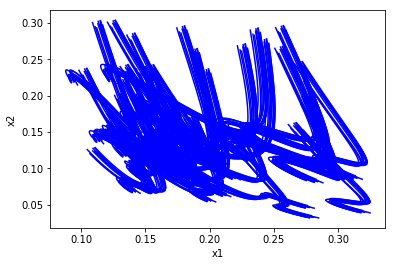

/home/manishg/Research/NExG/eval-emsoft/eval-gr/dconfigs_inv/d_object_BiologicalModel2
10
Avg vp is 0.03761698998128493
Max vp is 0.1892809656295267
/home/manishg/Research/NExG/eval-emsoft/eval-gr
Gradient: True
(334400, 28)
(300960, 28)
(300960, 9)
normalized

Setting the activation function to default - ReLU.

***** learning module *** 28
***** learning module *** 9
Epoch 1/30
4703/4703 [==============================] - 27s 6ms/step - loss: 0.0881 - accuracy: 0.7986 - mse: 0.0198
Epoch 2/30
4703/4703 [==============================] - 26s 6ms/step - loss: 0.0586 - accuracy: 0.8876 - mse: 0.0086
Epoch 3/30
4703/4703 [==============================] - 25s 5ms/step - loss: 0.0516 - accuracy: 0.9084 - mse: 0.0065
Epoch 4/30
4703/4703 [==============================] - 25s 5ms/step - loss: 0.0473 - accuracy: 0.9215 - mse: 0.0051
Epoch 5/30
4703/4703 [==============================] - 25s 5ms/step - loss: 0.0449 - accuracy: 0.9290 - mse: 0.0042
Epoch 6/30
4703/4703 [======================

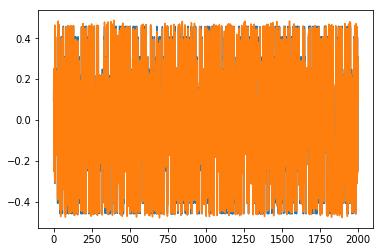

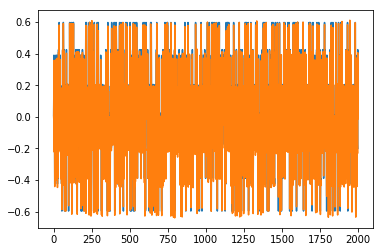

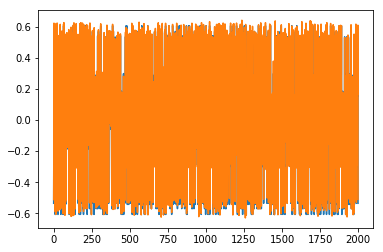

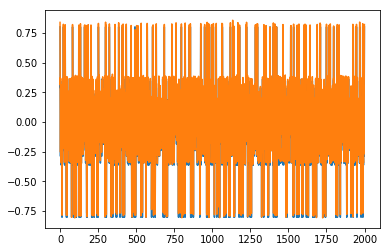

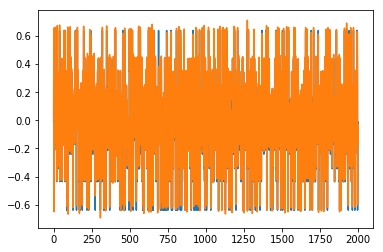

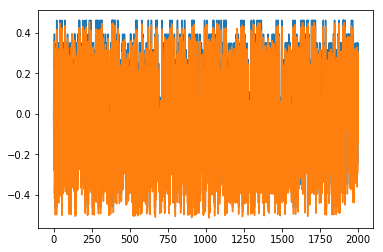

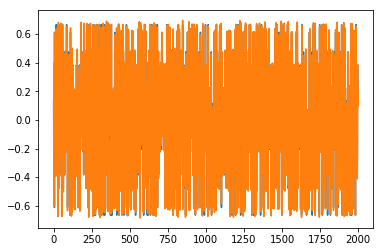

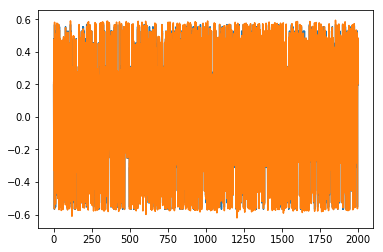

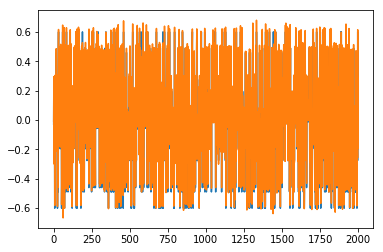

(33440, 9)
(33440, 9)


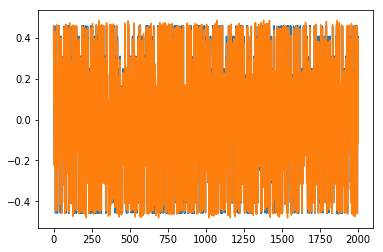

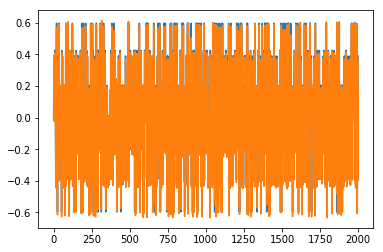

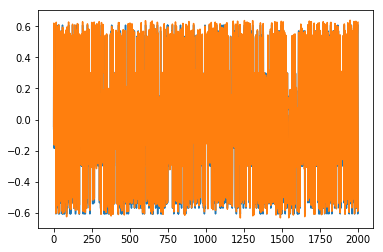

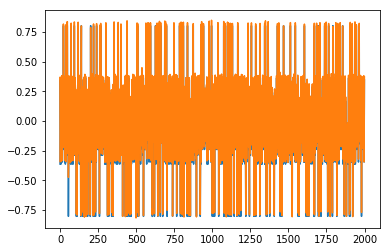

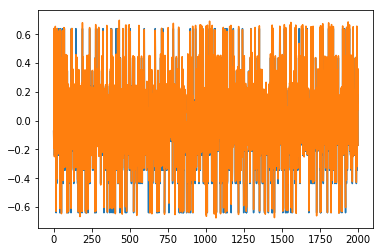

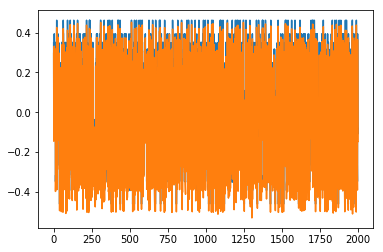

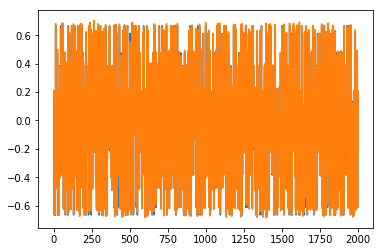

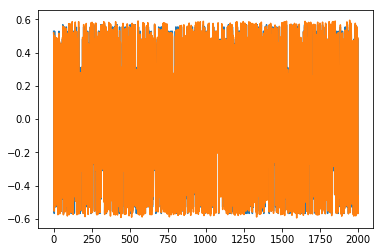

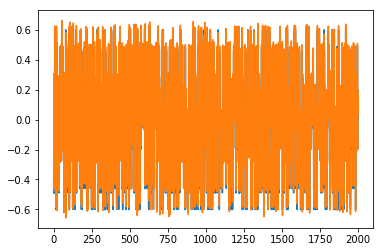

In [1]:
import matplotlib
%matplotlib inline

import os
nxg_path = os.environ.get('NXG_PATH')
print(nxg_path)

import sys
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')

from learningModule import DataConfiguration, CreateTrainNN

epochs = 30
dynamics = 'BiologicalModel2'
dataObject = DataConfiguration(dynamics=dynamics, dimensions=9, gradient_run=True)
dataObject.setSteps(200)
dataObject.setSamples(40)
# dataObject.setStepSize(0.001)
dataObject.setLowerBound([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
dataObject.setUpperBound([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
dataObject.generateTrajectories(scaling=0.01, dump_i_states=True)
dataObject.showTrajectories(xindex=1, yindex=2)
dataObject.createData(jumps=[1,2,5,7,11,13,17,19])

nnObject1 = CreateTrainNN(dynamics=dynamics, dnn_rbf='RBF')
nnObject1.createInputOutput(data_object = dataObject, inp_vars=['x','xp','vp','t'], out_vars=['v'])
nnObject1.setEpochs(epochs)
nnObject1.trainTestNN(optim='SGD', loss_fn='mae', layers=1, neurons=512)

In [8]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='BiologicalModel2')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()

ref_traj = dataObject.generateTrajectories(samples=1)[0]

# lowerBound = [0.35, 0.15, 0.15, 0.15, 1.30, 1.50, 0.80, 1.20, 1.00 ]
# upperBound = [0.40, 0.20, 0.20, 0.20, 1.35, 1.55, 0.85, 1.25, 1.05]

lowerBound = [0.25, 0.25, 0.05, 0.20, 0.85, 0.90, 0.95, 1.70, 0.90 ]
upperBound = [0.30, 0.30, 0.10, 0.25, 0.90, 0.95, 1.00, 1.75, 0.95]

evalObject.setUnsafeSet(lowerBound, upperBound)
# dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    print(ref_traj[0], ref_traj[80])
    dest = evalObject.generateRandomUnsafeStates(1)
#     dest_traj = dataObject.generateTrajectories(samples=1)[0]
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

# S-TaLiRo: robustness = 0.155 (k = 150)

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_BiologicalModel2.txt
Idx *** 0
[0.29876364 0.145934   0.1779609  0.20301377 0.26933578 0.15985067
 0.24241771 0.24140267 0.13789712] [0.33777854 0.16326513 0.138946   0.18568264 1.29819775 1.48536483
 0.86107919 1.35909371 1.18686188]
[[0.27815696018121844, 0.25709584780176026, 0.07105908519615457, 0.23463975074401525, 0.8970963500911316, 0.9119607209607721, 0.9763886714150725, 1.7093442986088467, 0.9094984624731626]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7745395763164514
Best robustness 0.010851185101611163
Final distance 0.03883770023460702
Final simulation: 51
Time taken: 3.0097107887268066
Idx *** 1
[0.23158609 0.13546399 0.20801585 0.20632008 0.15712572 0.255

Best robustness -0.017025191157104436
Final distance 0.07516859420269292
Final simulation: 3
Time taken: 0.1615734100341797
Idx *** 10
[0.25592527 0.21757027 0.1279725  0.11419969 0.27288802 0.16302184
 0.16811461 0.29833324 0.29874517] [0.28139328 0.18127795 0.10250449 0.15049201 1.08083056 1.33747199
 0.65359114 1.14378994 0.99703066]
[[0.2688420492880932, 0.2964680837230041, 0.07261835235494682, 0.21206868230887863, 0.8745631069915025, 0.910568696056471, 0.9548917697078537, 1.7425667496305397, 0.9410942418684066]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8313708596641547
Best robustness -0.0022265449293408235
Final distance 0.034553857763252226
Final simulation: 5
Time taken: 0.3007161617279053
Idx *** 11
[0.11626753 0.10715081 0.219

Best robustness 0.01322290588126901
Final distance 0.032496507465352535
Final simulation: 51
Time taken: 3.167173147201538
Idx *** 20
[0.25075903 0.1641131  0.1138217  0.2538412  0.13634345 0.25421514
 0.29696243 0.16065725 0.17919883] [0.28309629 0.21810388 0.08148444 0.19985042 0.97967661 0.97497054
 1.0272962  1.87952994 1.0958227 ]
[[0.292278901889303, 0.28370980400664497, 0.09142711664717344, 0.2030422135023455, 0.8659812965563392, 0.9464059112343991, 0.9756180400710878, 1.703282132720633, 0.9484156454093076]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09930764711400183
Best robustness 0.01329405465316058
Final distance 0.03839811987875799
Final simulation: 51
Time taken: 3.3132927417755127
Idx *** 21
[0.1218398  0.18296199 0.1957294

Best robustness -8.48640800531486e-05
Final distance 0.03338263086486577
Final simulation: 25
Time taken: 1.5143611431121826
Idx *** 30
[0.21843098 0.17513582 0.22013344 0.21653899 0.10042568 0.23686195
 0.28282426 0.2305492  0.11908267] [0.32765318 0.20292946 0.11091124 0.18874536 1.12089663 1.14974161
 0.93963123 1.65591421 1.09703857]
[[0.26834537323372964, 0.29829113663470186, 0.08813457050775417, 0.2392259927801918, 0.8844403191791477, 0.9145923445446994, 0.9686510979317706, 1.7058805759596185, 0.9159730490734893]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3407494524682231
Best robustness 0.00863209124501918
Final distance 0.04526659996931789
Final simulation: 51
Time taken: 3.2417831420898438
Idx *** 31
[0.27905881 0.1552344  0.226

Best robustness 0.004381335475967418
Final distance 0.07078940724364048
Final simulation: 51
Time taken: 3.2285351753234863
Idx *** 40
[0.15680609 0.21238621 0.25728766 0.24883439 0.16689222 0.10226123
 0.10798277 0.15041413 0.21410504] [0.30301815 0.23687261 0.1110756  0.22434799 1.07450935 1.21482985
 0.94614315 1.47107412 1.00715769]
[[0.2760275823368586, 0.26224995436520293, 0.08639279424272844, 0.24007767918812611, 0.8829822260997424, 0.9122453665994985, 0.9838546622939736, 1.7075701601771756, 0.9207078456887933]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4419222651570701
Best robustness 0.01030745223324199
Final distance 0.08705992463324999
Final simulation: 51
Time taken: 3.295224189758301
Idx *** 41
[0.29492893 0.14289255 0.12430

Best robustness -0.007570538192566367
Final distance 0.042205410748925976
Final simulation: 6
Time taken: 0.3556668758392334
Idx *** 50
[0.22950813 0.16610077 0.14515617 0.25882368 0.18039583 0.23643798
 0.14676641 0.18728392 0.26428222] [0.28141552 0.21285643 0.09324878 0.21206803 1.01184955 1.12401032
 0.950717   1.58384138 1.07707559]
[[0.2631503004210168, 0.29661638984836836, 0.06857669858969573, 0.20827876829033076, 0.8746772684924364, 0.9374814027583243, 0.9750115704004464, 1.7337968093847906, 0.9355951126537461]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3183018862637085
Best robustness -0.0008393024800398274
Final distance 0.03908496833871333
Final simulation: 11
Time taken: 0.7182188034057617
Idx *** 51
[0.16182897 0.11737488 0.

Best robustness -0.005738410536548555
Final distance 0.03175904212699203
Final simulation: 41
Time taken: 2.5712437629699707
Idx *** 60
[0.16931476 0.17483913 0.25083005 0.18942771 0.22220124 0.14786637
 0.20476491 0.26381619 0.20877617] [0.30474508 0.18538221 0.11539973 0.17888463 1.11454802 1.27334582
 0.82331559 1.39804288 1.08246162]
[[0.2781002185279632, 0.2568645988112623, 0.06779498358364111, 0.23289059694084385, 0.8616208615578969, 0.9264002979093794, 0.9742803539402602, 1.7283226105384797, 0.929868085269644]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
77
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5862717483965163
Best robustness 0.006189146734500578
Final distance 0.09367888657286111
Final simulation: 51
Time taken: 3.350600242614746
Idx *** 61
[0.17465728 0.14984592 0.27978

Best robustness 0.0059306001437330474
Final distance 0.06429451464892136
Final simulation: 51
Time taken: 3.1728501319885254
Idx *** 70
[0.15827014 0.24172922 0.28802681 0.14353608 0.1153138  0.26599266
 0.11203436 0.25711929 0.12736385] [0.31872963 0.20566614 0.12756732 0.17959916 1.12124416 1.37969595
 0.72456088 1.11882621 0.86995213]
[[0.2591540002227203, 0.2962524522998034, 0.0935243881865183, 0.21476003320082532, 0.8808543365154802, 0.9202925711680102, 0.9898189822099346, 1.7358702862885655, 0.9368656201939942]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8454173931659033
Best robustness 0.004549273588817515
Final distance 0.04677986126828473
Final simulation: 51
Time taken: 3.226942777633667
Idx *** 71
[0.16367986 0.17846873 0.28041

Best robustness 0.028499728928133725
Final distance 0.023925889963906443
Final simulation: 51
Time taken: 3.1367392539978027
Idx *** 80
[0.28871789 0.29219611 0.15461924 0.21235859 0.10499736 0.27351444
 0.10431522 0.28773087 0.12079175] [0.32841199 0.27065065 0.11492514 0.23390406 1.15281888 1.26213393
 0.94686543 1.45599661 1.00651429]
[[0.29098236832841023, 0.279429574490792, 0.05658414721639292, 0.2333319166554031, 0.8816756746954616, 0.9373503519478141, 0.9870928764765554, 1.7397570725068272, 0.9389289675596043]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5197674062043047
Best robustness -0.013095203237412145
Final distance 0.07797859128273585
Final simulation: 3
Time taken: 0.15270733833312988
Idx *** 81
[0.12397276 0.17614469 0.211

Best robustness 0.006817500871910562
Final distance 0.07942374738529688
Final simulation: 51
Time taken: 3.102513074874878
Idx *** 90
[0.19680626 0.2240621  0.15286117 0.10932636 0.17924407 0.20535001
 0.21441572 0.17253621 0.11426521] [0.26266213 0.1922682  0.0870053  0.14112026 0.9461596  1.16538227
 0.67022961 1.17564401 0.79183876]
[[0.2575965110229658, 0.29903957343433074, 0.08944686100491052, 0.22421915720404254, 0.8702831421106249, 0.9251216391539329, 0.9726012404855283, 1.7312126089867934, 0.9134530989982819]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6315903794865463
Best robustness -0.0256635315264806
Final distance 0.063815469790785
Final simulation: 4
Time taken: 0.21727871894836426
Idx *** 91
[0.11476468 0.19700278 0.1276185

Best robustness -0.002678258725275273
Final distance 0.03478921169910164
Final simulation: 5
Time taken: 0.2906467914581299
Idx *** 100
[0.12734068 0.12609378 0.14279525 0.15886348 0.20852761 0.25175988
 0.22149652 0.11448444 0.26428374] [0.20745828 0.15296592 0.06267765 0.13199134 0.75591437 0.95182453
 0.69299235 1.3381379  0.83965886]
[[0.2562111072603542, 0.28132890238114744, 0.07136316479334266, 0.2195128276751012, 0.8744959008360497, 0.9180616735105122, 0.9840998985728231, 1.7434999557111461, 0.9373005346234176]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4290510951034193
Best robustness -0.0013804636933263392
Final distance 0.03404690938136724
Final simulation: 8
Time taken: 0.48880457878112793
Idx *** 101
[0.12441925 0.24396971 0.

Best robustness -0.013905782752987372
Final distance 0.03354477639330423
Final simulation: 25
Time taken: 1.516085147857666
Idx *** 110
[0.14037947 0.29230061 0.23336278 0.19267014 0.13622464 0.18870833
 0.19596848 0.16171464 0.29268191] [0.28241663 0.27831305 0.09132562 0.20665771 0.96649621 1.0272377
 0.94059066 1.63782201 1.02622851]
[[0.2893952875614778, 0.27578781821791576, 0.09372132039721254, 0.2249087053882918, 0.8675145581248294, 0.9126072635386583, 0.9957720932997824, 1.7322830457051879, 0.9465068204639782]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20394806701367943
Best robustness -0.0030620983268914714
Final distance 0.04896994085725619
Final simulation: 3
Time taken: 0.1590712070465088
Idx *** 111
[0.25964697 0.17162111 0.1

Best robustness -0.006447387086166656
Final distance 0.03644328965731541
Final simulation: 6
Time taken: 0.3315715789794922
Idx *** 120
[0.13779992 0.26346133 0.1469566  0.16501029 0.19106254 0.19172257
 0.13388793 0.25003688 0.23155753] [0.22081132 0.25411388 0.0639452  0.17435774 0.78723326 0.92725335
 0.7898707  1.43915541 0.83352592]
[[0.27446852098486035, 0.28705961535629965, 0.09002877057412294, 0.21582001223991748, 0.8700290102092794, 0.903657706402355, 0.9639345832745554, 1.7229555562148564, 0.927765634133285]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2118780746436405
Best robustness -8.429240454987941e-05
Final distance 0.01219487689829898
Final simulation: 22
Time taken: 1.3458518981933594
Idx *** 121
[0.19283732 0.2843464  0.

Best robustness -0.019092819149116855
Final distance 0.054376092898429866
Final simulation: 6
Time taken: 0.35143470764160156
Idx *** 130
[0.24437657 0.18307076 0.18194039 0.27476475 0.16664363 0.2465362
 0.26960091 0.2394705  0.21866419] [0.31981869 0.23052823 0.10649827 0.22730727 1.1285091  1.10730756
 1.09412506 1.896442   1.2731204 ]
[[0.25096252195187874, 0.2960915505239343, 0.07551578698200281, 0.2115671184895286, 0.8666128269367961, 0.9175100191493688, 0.9821796292729081, 1.7402464188397442, 0.9110489523555791]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2761665046228356
Best robustness 0.012095648835277362
Final distance 0.030425434199695178
Final simulation: 51
Time taken: 3.131906509399414
Idx *** 131
[0.25419415 0.26482783 0.1

Best robustness -0.009422751645311589
Final distance 0.03923676278073294
Final simulation: 6
Time taken: 0.3249473571777344
Idx *** 140
[0.14997236 0.15452898 0.27784998 0.22493229 0.25364711 0.22594209
 0.19844752 0.1204607  0.1920943 ] [0.30221482 0.17907102 0.12560752 0.20039025 1.13404509 1.35241562
 0.90138805 1.39160329 1.11144011]
[[0.28181010008773727, 0.25801522626234286, 0.08032851034866673, 0.20609051209861817, 0.8822257856491214, 0.9485393621129365, 0.9706311434576959, 1.7127776627784628, 0.911488239047175]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6084618606412387
Best robustness 0.00806688627800771
Final distance 0.03256223872582467
Final simulation: 51
Time taken: 3.0768661499023438
Idx *** 141
[0.24741201 0.10276256 0.12

Best robustness -0.018779208367065148
Final distance 0.02014246169312313
Final simulation: 35
Time taken: 2.2588753700256348
Idx *** 150
[0.25689219 0.10629011 0.24683641 0.2684595  0.20081099 0.14033521
 0.28082431 0.28651684 0.22848789] [0.36288096 0.16987597 0.14084765 0.20487364 1.32070769 1.3410828
 1.00375464 1.6948935  1.38183454]
[[0.28354978197545233, 0.2537372245794637, 0.07755695045905417, 0.23289332891900177, 0.8650012380120793, 0.9045908894066613, 0.9527241005745904, 1.718338982894744, 0.9216224105621554]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5784695831091246
Best robustness 0.010751381968588158
Final distance 0.031505777925057835
Final simulation: 51
Time taken: 3.4403834342956543
Idx *** 151
[0.283465   0.10917786 0.1

Best robustness 0.007378244192486949
Final distance 0.10945772415068596
Final simulation: 51
Time taken: 3.350137948989868
Idx *** 160
[0.26051388 0.12919993 0.27271133 0.2019054  0.23283259 0.21576245
 0.17265164 0.24135886 0.28211524] [0.36367166 0.14637475 0.16955356 0.18473058 1.39240325 1.66659835
 0.80017212 1.20502167 1.23847411]
[[0.292731474375923, 0.25098893213617757, 0.05147902491940562, 0.21120656359004622, 0.8957306736077888, 0.9411474971622201, 0.9778752593017643, 1.7260935223192808, 0.9191274596261282]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9983797860682407
Best robustness 0.01293111248760151
Final distance 0.027383587675192254
Final simulation: 51
Time taken: 3.4075798988342285
Idx *** 161
[0.10257253 0.28499502 0.221

Best robustness 0.009289875943254255
Final distance 0.021809895749239416
Final simulation: 51
Time taken: 3.330040216445923
Idx *** 169
[0.25755082 0.28342907 0.1270312  0.25467416 0.11616616 0.14709233
 0.28188292 0.29032909 0.2627583 ] [0.30347861 0.30937724 0.08110341 0.22872599 1.02417925 0.91365835
 1.13015567 2.13345779 1.18596886]
[[0.25257732878814726, 0.2994877175282833, 0.08522498253503391, 0.22731384223416196, 0.8829929711017498, 0.9159675924034976, 0.9972607329819169, 1.7367038868918037, 0.9257785253164779]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18151213476943862
Best robustness 0.012485541619475238
Final distance 0.035448306628086734
Final simulation: 51
Time taken: 3.323500156402588
Idx *** 170
[0.28091035 0.23386531 0.

Best robustness -9.207373133290897e-05
Final distance 0.03398395148060464
Final simulation: 18
Time taken: 1.1013567447662354
Idx *** 179
[0.14546889 0.25433276 0.28114529 0.10535713 0.218892   0.10736723
 0.23592945 0.12633012 0.29319177] [0.30595392 0.20114052 0.12066026 0.15854937 1.12058214 1.34318915
 0.71570566 1.20425857 1.00325045]
[[0.28879632818022544, 0.2957808524249094, 0.07113396313953416, 0.22437493289323493, 0.8506206057655278, 0.9076067219243655, 0.9609496557915588, 1.744903012667145, 0.9096431015203266]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7997887599353778
Best robustness 0.002464472464891676
Final distance 0.09331524883849925
Final simulation: 51
Time taken: 3.4016878604888916
Idx *** 180
[0.29227576 0.20361027 0.

Best robustness -0.0028090030729185367
Final distance 0.06718578918371584
Final simulation: 5
Time taken: 0.29868268966674805
Idx *** 189
[0.12472267 0.14553287 0.15212722 0.23932317 0.16926516 0.22704087
 0.10786903 0.17922437 0.21461494] [0.21400619 0.20269846 0.0628437  0.18215757 0.7541923  0.90815112
 0.83979609 1.49105226 0.82790191]
[[0.2941784373999455, 0.2512440959063353, 0.08219672823331331, 0.24232123632017843, 0.8676314521022372, 0.9204000543337935, 0.9966255660142838, 1.7232839516883451, 0.9073538102435212]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19886193534503263
Best robustness -0.02339206349888434
Final distance 0.059653936508544426
Final simulation: 5
Time taken: 0.28688478469848633
Idx *** 190
[0.24641979 0.16366468 

Best robustness -0.004346034803283216
Final distance 0.06930964174931634
Final simulation: 4
Time taken: 0.2281491756439209
Idx *** 199
[0.19630238 0.27185439 0.10804709 0.26573647 0.25553225 0.29525431
 0.21070489 0.19684085 0.1109413 ] [0.23490333 0.29264627 0.06944613 0.24494459 0.87457247 0.92401721
 1.13121511 1.91685042 1.05456334]
[[0.27958470225887283, 0.27118714534369115, 0.051683113415416634, 0.223025203881165, 0.8939886583093788, 0.9104758887001784, 0.9558711262234441, 1.729034814901379, 0.9370628770806725]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14448668977754922
Best robustness -0.003874706335852629
Final distance 0.0665276162432544
Final simulation: 4
Time taken: 0.2273883819580078
Idx *** 200
[0.14793128 0.23015686 0.27

Best robustness 0.009199404473978656
Final distance 0.038146702053472724
Final simulation: 51
Time taken: 3.333251476287842
Idx *** 209
[0.15110633 0.25957057 0.29887834 0.25699419 0.12924462 0.23667752
 0.21587686 0.12006391 0.10585794] [0.32805707 0.26794017 0.1219276  0.24862459 1.13524985 1.18084793
 1.10450633 1.72366027 1.1191932 ]
[[0.28504525817538884, 0.26426270366214044, 0.06294986878830022, 0.20314998876210028, 0.8859431477059058, 0.9058727077051487, 0.961178866683189, 1.7137280219551796, 0.9495220380088694]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3594699299989891
Best robustness 0.006785155719114283
Final distance 0.060965696709204056
Final simulation: 51
Time taken: 3.468334436416626
Idx *** 210
[0.12109699 0.18882653 0.2

Best robustness -0.0013530670007322332
Final distance 0.06296039130857008
Final simulation: 5
Time taken: 0.2884862422943115
Idx *** 219
[0.15524278 0.19252054 0.19803568 0.17425629 0.23903326 0.11231018
 0.2239016  0.17927634 0.13129476] [0.26316651 0.19781741 0.09011194 0.16895942 0.96814396 1.1334971
 0.80789749 1.39847991 0.92463819]
[[0.2597251745330063, 0.2985888288313103, 0.0957689030459208, 0.20374487256791732, 0.8657042906179341, 0.9116637862162584, 0.9749311384549741, 1.7410042583143266, 0.9029381334619276]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4424810666233771
Best robustness -0.018587136149377903
Final distance 0.05246277661452808
Final simulation: 4
Time taken: 0.2244265079498291
Idx *** 220
[0.26155755 0.23492866 0.135

Best robustness 0.0033369081753062274
Final distance 0.06528269161418439
Final simulation: 51
Time taken: 3.3451478481292725
Idx *** 229
[0.2308147  0.19007796 0.24184998 0.21124544 0.23434057 0.22145072
 0.26503261 0.21078588 0.25427175] [0.33766325 0.1965008  0.13500143 0.2048226  1.25348081 1.35920795
 0.94958155 1.54662328 1.2924174 ]
[[0.2868186281480173, 0.27131528702915036, 0.0856229271797461, 0.2102811551272749, 0.8660278807630019, 0.9119336305019169, 0.9794527619687159, 1.7177460854318987, 0.9253318282880374]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6039991589671267
Best robustness 0.011678411157209509
Final distance 0.03000085214956723
Final simulation: 51
Time taken: 3.2981643676757812
Idx *** 230
[0.25113837 0.14401248 0.14

Best robustness -0.007316355323826629
Final distance 0.030310377882490986
Final simulation: 12
Time taken: 0.7275633811950684
Idx *** 239
[0.28740058 0.23667817 0.18702183 0.16206605 0.2632681  0.24588812
 0.15940494 0.14279667 0.25620641] [0.32936504 0.19539008 0.14505736 0.20335414 1.28180644 1.58522731
 0.81772401 1.17528779 1.10541156]
[[0.2716316253445983, 0.2924599005748212, 0.05809293798246201, 0.22891940434602517, 0.8824558215774834, 0.9405374525340604, 0.9920111212409659, 1.7160514849342365, 0.9092274414948786]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9550709867802291
Best robustness 0.01116361248677937
Final distance 0.09058194741680917
Final simulation: 51
Time taken: 3.2192366123199463
Idx *** 240
[0.13795418 0.11997706 0.1

Best robustness -0.0018030782098794607
Final distance 0.060994047940736984
Final simulation: 3
Time taken: 0.15880918502807617
Idx *** 249
[0.17362347 0.26801598 0.11434055 0.22217964 0.29499179 0.11223547
 0.23258109 0.20125463 0.29146677] [0.22443576 0.27963337 0.06352827 0.21056225 0.85166605 0.89938195
 1.00982118 1.84987598 1.0748059 ]
[[0.25495578806871755, 0.2611552292156043, 0.06994700368701884, 0.21236243117353304, 0.8690971213112615, 0.9473322875247214, 0.9950232961202645, 1.7221703989520127, 0.920980691898925]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_BiologicalModel2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08951840994386075
Best robustness -0.008414215024902916
Final distance 0.04959873289507901
Final simulation: 16
Time taken: 0.9528448581695557
28.468
2.3810345614719065e-05
51.0